<div align="right" style="text-align: right"><i>Peter Norvig, Oct 2017<br>Data updated monthly</i></div>

# Bicycling Statistics

During a pandemic, bicycling is a great way to (1) spend some time, (2) get some exercise, (3) stay outside and be safe, and (4) track how you are progressing against your goals. My data comes from [Strava](https://www.strava.com/athletes/575579). At various times I've had various goals:
- **Distance**: I do about 6,000 miles a year.
- **Elevation**: In 2022, for the first time I set an elevation goal: **space**  (100 km of  climbing).
- **Wandering**: In 2020, I started using [Wandrer.earth](https://wandrer.earth/athletes/3534/) to track what 
new roads I have ridden.
- **Eddington**: I've done 66 miles or more on 66 different days. So 66 is my Eddington Number.
- **Speed**: I'm not trying to go fast, but I am interested in understanding how my speed varies with the steepness of the hill.

This notebook is mostly for my own benefit, but if you're a cyclist you're welcome to adapt it to your own data, and if you're a data scientist, you might find it an interesting example of exploratory data analysis.  The companion notebook [**BikeCode.ipynb**](BikeCode.ipynb) has the implementation details.

# Yearly Distance and Other Stats

Here are my overall stats for each year since I started keeping track in mid-2014. I have done 6,000 miles per year since 2016, except for 2020 when an injury kept me sidelined for two months. (*Note*: The column **vam** is vertical meters ascended per hour, **fpm** is feet climbed per mile, and **pct**  is the average grade of  the elevation, in percent.)


In [1]:
%run BikeCode.ipynb

yearly

,year,hours,miles,feet,mph,vam,fpm,pct,kms
,2021,490.53,6064,196634,12.36,122.0,32.0,0.61,9757.78
,2020,438.88,5342,94777,12.17,66.0,18.0,0.34,8595.12
,2019,476.32,6016,149797,12.63,96.0,25.0,0.47,9679.90
,2018,475.93,6101,158642,12.82,102.0,26.0,0.49,9816.51
,2017,567.33,7356,202096,12.97,109.0,27.0,0.52,11836.45
,2016,486.38,6339,201453,13.03,126.0,32.0,0.60,10199.77
,2015,419.95,5453,209859,12.98,152.0,38.0,0.73,8773.23
,2014,191.03,2469,118481,12.93,189.0,48.0,0.91,3972.78


# Elevation

My friend [A. J. Jacobs](https://ajjacobs.com/) has an incling treadmill, and for 2022 set the goal of **walking to space**: climbing a total elevation equal to the distance from the Earth's surface to the top of the atmoshere. [A group](https://www.facebook.com/groups/260966686136038) of about 40 of us joined the quest. The boundary of "space" is vague, but could reassonably be reckoned as any of the following:

|Units|In Feet|Description|
|-- --|--|--|
|100 km|328,084|The [Kármán line](https://en.wikipedia.org/wiki/K%C3%A1rm%C3%A1n_line)|
|300 kilofeet|300,000|A nice round number|
|10 Everests|290,320|A classic benchmark|
|50 miles|264,000|[NASA's edge of space](https://science.nasa.gov/edge-space)|


Here's how I'm progressing towards space (I took some time off in June, and made up for it in July):

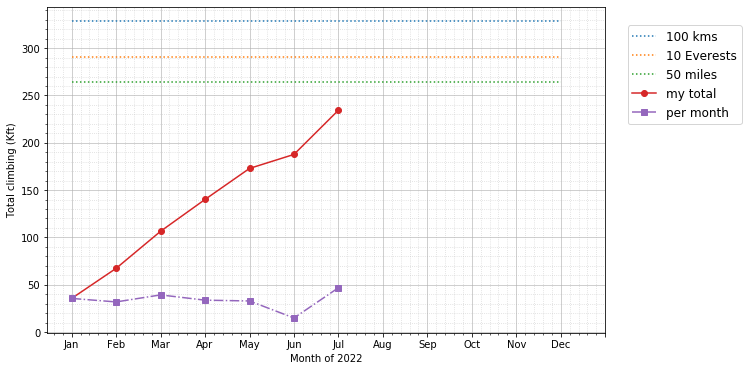

In [2]:
climbing()

# Wandering 

The website [**Wandrer.earth**](https://wandrer.earth) tracks the  distinct roads a user has biked on. It provides a fun incentive to get out and explore new roads. The site is gamified in a way that the biggest rewards are for first reaching 25% of the road-miles in each city or neighborhood, and then 90%.  (You get no credit for repeating a road you've already been on.)

For the most part, your scores can only go up, as you cover more roads over time. But the [underlying map](https://www.openstreetmap.org/) is periodically updated, and sometimes roads are added or removed from a city's map, so your mileage may vary. 

The wandrer.earth site does a great job of showing my current status in all the places I've been, but I wanted to track my progress month-by-month, so I created the charts below.

Each line in the legend gives the percentage of roads ridden (miles ridden / total miles), miles to go to the next percentage reward, and the name of the town or area. 

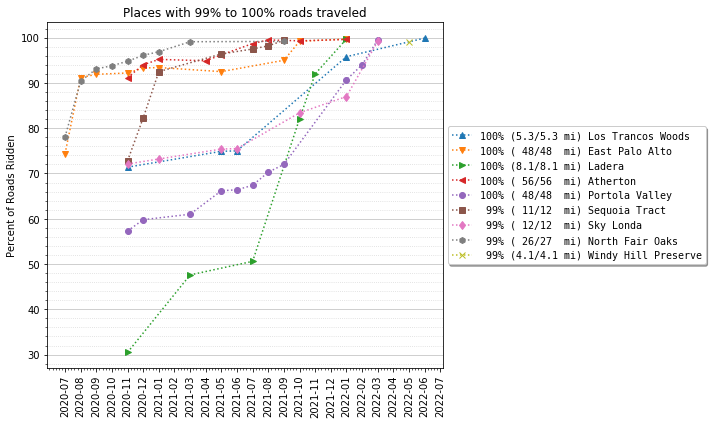

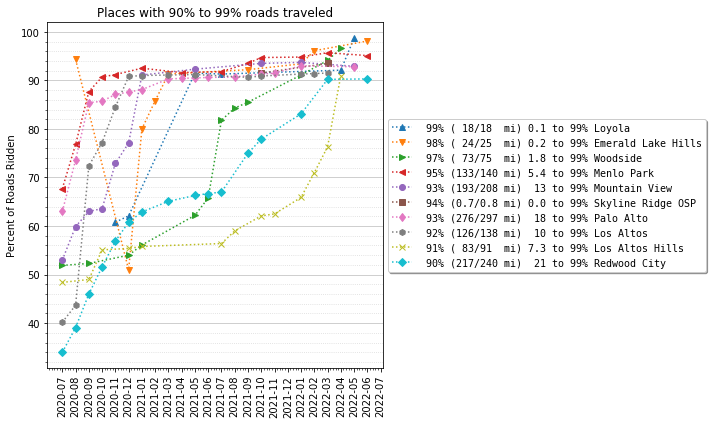

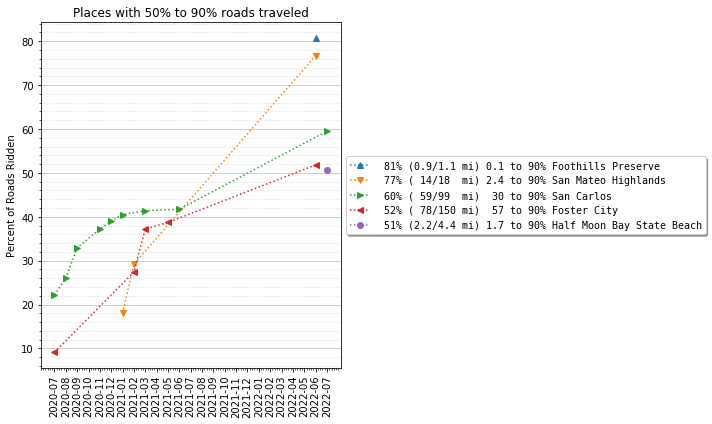

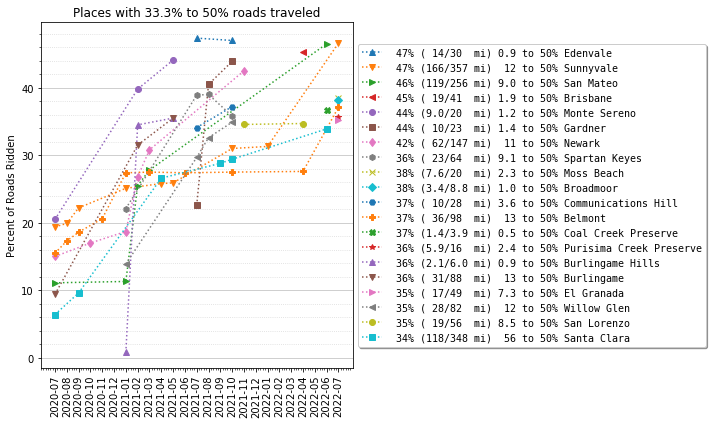

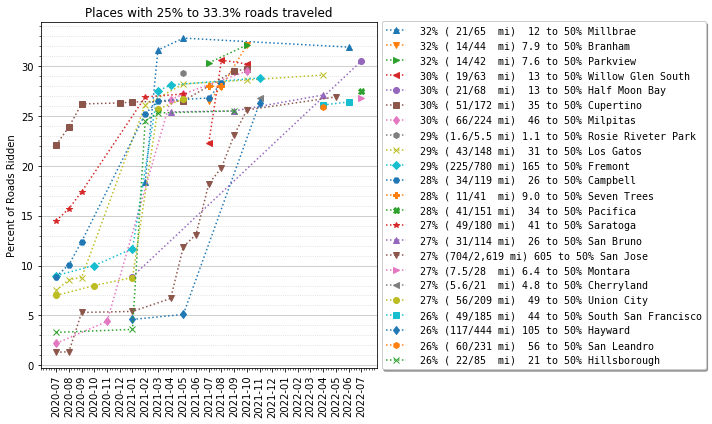

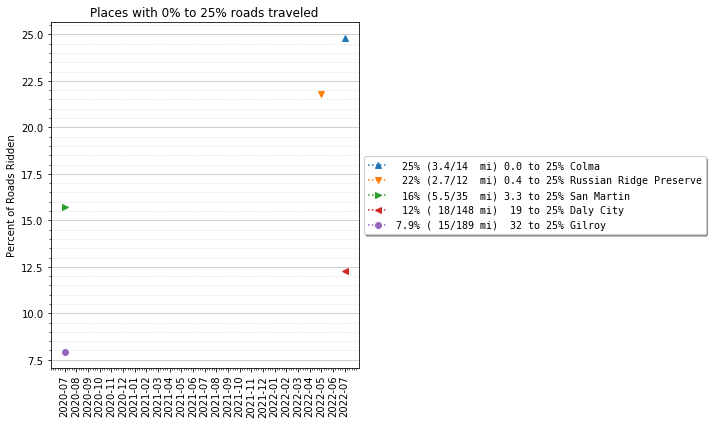

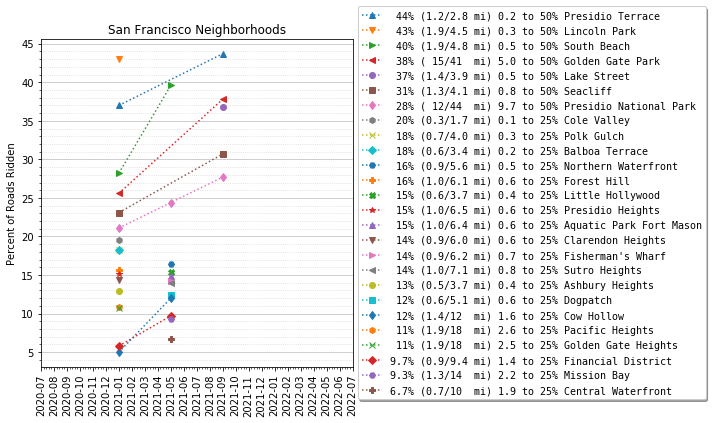

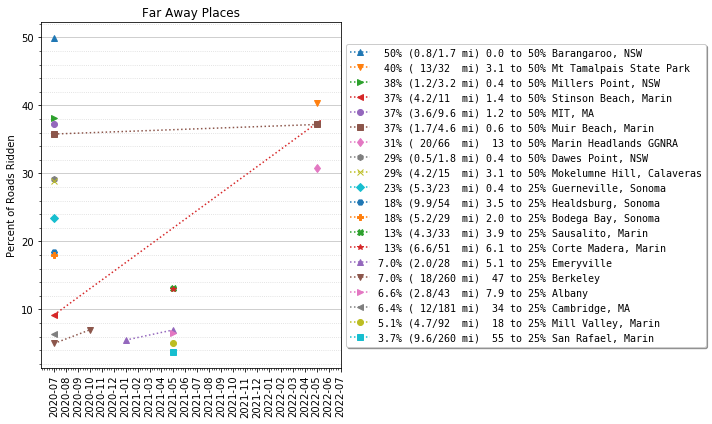

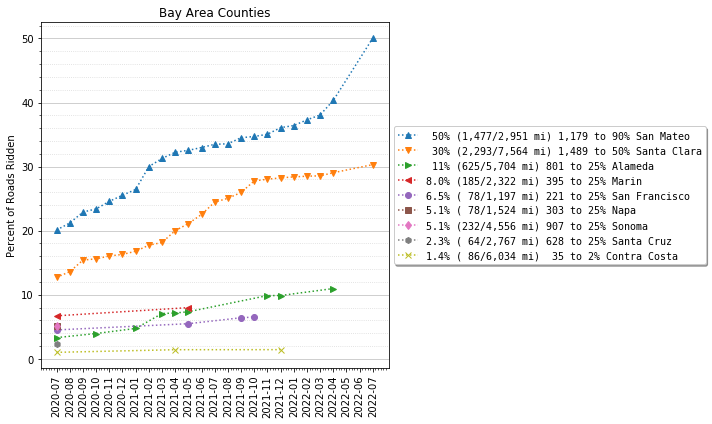

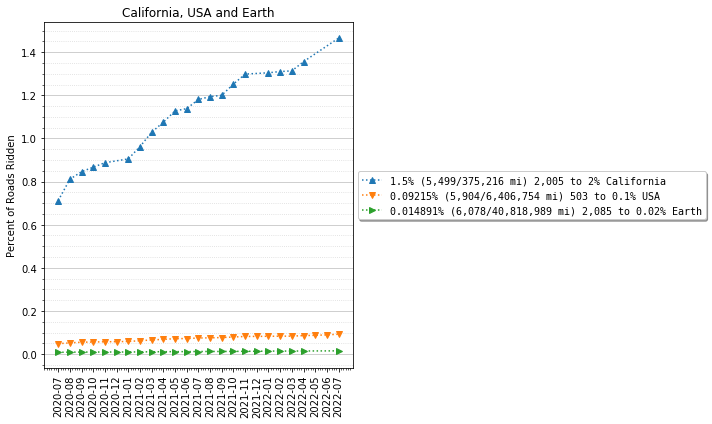

In [3]:
wandering(places)

# Wandering Across Two Counties

I live in Santa Clara County, but I'm only 2 blocks from San Mateo County, so I ride in both. And while Jason Molenda is a whopping 1900 miles ahead of me in SMC and Megan Gardner is 1200 miles ahead of me in SCC, it turns out that I occupy a small section of the [Pareto front](https://en.wikipedia.org/wiki/Pareto_front) for the two counties together: I have ridden 50% of SMC and 30% of SCC, and nobody on wandrer.earth has simultaneously done more in both counties. Here are the leaders and a plot of the Pareto front: the dashed line where dots indicate cyclist's initials; I'm the "PN" in the middle.

,Name,SMC %,SCC %,SMC miles,SCC miles,Total miles
0,Barry Mann,73.37,29.35,2165,2220,4385
1,Jason Molenda,7.13,54.65,210,4134,4344
2,Peter Norvig,50.06,30.31,1477,2293,3770
3,Brian Feinberg,29.72,35.59,877,2692,3569
4,Jim Brooks,4.23,43.39,125,3282,3407
5,Megan Gardner,89.43,8.69,2639,657,3296
6,Matthew Ring,72.67,1.48,2144,112,2256
7,Elliot Huff,50.43,8.14,1488,616,2104


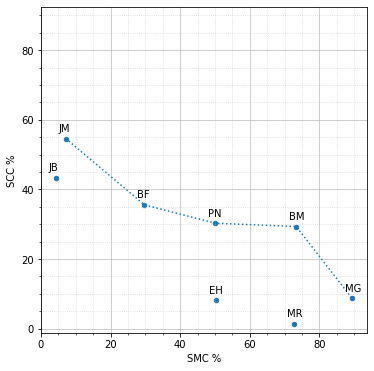

In [4]:
pareto_front(leaders)

# Eddington Number

The  physicist [Sir Arthur Eddington](https://en.wikipedia.org/wiki/Arthur_Eddington), a contemporary of Einstein, was a pre-Strava bicyclist who favored this metric:

> *Your [**Eddington Number**](https://www.triathlete.com/2011/04/training/measuring-bike-miles-eddington-number_301789) is the largest integer **e** such that you have cycled at least **e** miles on at least **e** days.*

My Eddington number progress over the years, in both kilometers and miles:

In [5]:
Ed_progress(rides)

,year,Ed_km,Ed_mi
0,2022,96,66
1,2021,93,65
2,2020,87,62
3,2019,80,56
4,2018,77,54
5,2017,73,51
6,2016,67,47
7,2015,61,42
8,2014,46,35
9,2013,31,24


My current Eddington Number is **96 in kilometers and 66 in miles**: I've ridden at least 66 miles on at least 66 days (but not 67 miles on 67 days). My number is above [the median for Strava](https://swinny.net/Cycling/-4687-Calculate-your-Eddington-Number), but not nearly as good as Eddington himself: his number was **84 in miles** when he died at age 62, and his roads, bicycles, and navigation aids were not nearly as nice as mine, so bravo zulu to him. 

How many more rides will I need to reach higher Eddington numbers? I call that the *Eddington Gap*:

In [6]:
Ed_gaps(rides)

,kms,kms gap,miles,miles gap
0,96,-1,66,-5
1,97,5,67,4
2,98,9,68,9
3,99,12,69,22
4,100,14,70,30
5,101,16,71,37
6,102,19,72,40
7,103,22,73,44
8,104,26,74,46
9,105,31,75,53


In kilometers, I need 5 rides to improve from 96 to 97, and 14 rides to improve to 100.

In miles, I need 4 rides to improve from 66 to 67, and 30 rides to improve to 70.

Here are some properties of Eddington numbers:
- Your Eddington number is monotonic: it can never decrease over time. 
- To improve from an Eddington number of *n* to *n* + 1 can take as few as 1 ride, or as many as *n* + 1 rides.
  + *Suppose you have done 9 rides, each of exactly 10 miles. Your Eddington number is 9.*
  + *You would need 1 ride of 10 miles to improve from a number of 9 to 10.*
  + *You would then need 11 rides of 11 miles to improve from a number 10 to 11.*
- Your metric Eddington number will always be greater than or equal to your imperial Eddington number.
- Your metric Eddington number will never be more than 1.609344 times your  imperial Eddington number.
- Of two riders, it is possible that one has a higher metric number and the other a higher imperial number.

*Note:* the definition of Eddington Number seems precise, but what exactly does ***day*** mean? The New Oxford dictionary has three senses:

1. a period of 24 hours; 
2. a unit of time, reckoned from one midnight to the next;
3. the part of a day when it is light. 

I originally assumed sense 2, but I wanted to accept sense 1 for what [bikepackers](https://bikepacking.com/) call a [sub-24-hour overnight](https://oneofsevenproject.com/s24o-bikepacking-guide/) (S24O): a ride to a camping site in the afternoon, pitching a tent for the night, and returning back home the next morning.  And then COVID struck, the camping sites closed, so why not allow an S24O where I sleep in my own home? I realize Eddington had a lot more hardships than we have (World War I, the 1918 pandemic, and World War II, for example), but I hope he would approve of this modest accomodation on my part.

# Hill-Index: Speed versus Grade on Short Climbs

The Eddington number reminds me of the [**h-index**](https://en.wikipedia.org/wiki/H-index) metric for scientific publications. I invented another metric:

> *Your **hill-index** is the maximum integer **h** where you can regularly climb an **h** percent grade at **h** miles per hour.*

I'll plot grade versus speed for segments (not rides) with two best-fit curves: a blue quadratic and an orange cubic. I'll also superimpose a red dotted line where grade = speed.

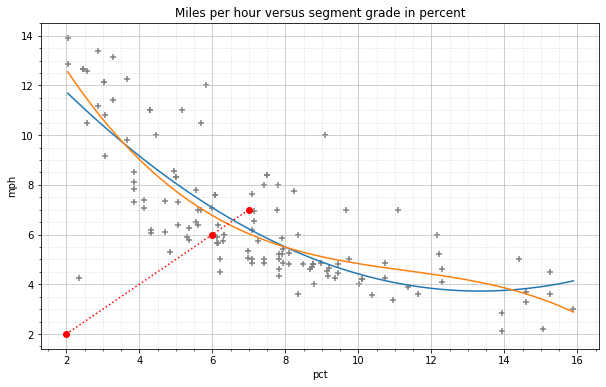

In [7]:
show('pct', 'mph', segments[segments.pct > 2], 
     'Miles per hour versus segment grade in percent')
plt.plot((2, 6, 7), (2, 6, 7), 'ro:');

Both  best-fit curves are above the red circle at 6% and below the red circle for 7%, so  **my hill-index is 6**. We also see that I can cruise at 14 mph on a 2% grade, but only about 7 mph at 6% grade, and around 5.5 mph on 8% grades.

 # Speed versus Grade on Long Rides

The plot above tell me how fast I should expect to climb a particular hill, but what about average time on longer rides? Here's a plot of my speed versus steepness (measured in feet climbed per mile rather than in percent).

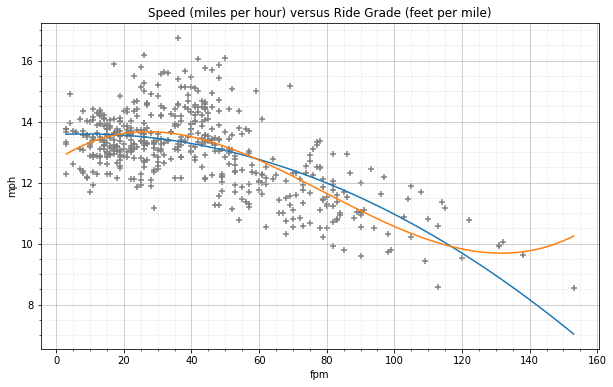

In [8]:
show('fpm', 'mph', rides, 'Speed (miles per hour) versus Ride Grade (feet per mile)')

So, I average a little under 14 mph when the overall route is fairly flat, with a lot of variability from 12 to 16 mph, depending more on my level of effort (and maybe the wind) than on the grade of the road. But when the grade is steeper than 50 ft/mile, my speed falls off quickly: down to 12mph at 80 ft/mile;  11 mph at 100 ft/mile; and around 10 mph at 120 ft/mile. Note that 120 ft/mile is only 2.3% grade, but if you figure a typical route is 1/3 up, 1/3 down, and 1/3 flat, then that's 6.9% average grade on the up part.

I can use this to predict the time of a ride.  For example, if I'm in  La Honda and want to get to Pescadero, which  way is faster: the [coast route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.4039496!2d37.3116594!3s0x808f062b7d7585e7:0x942480c22f110b74!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (15.7 miles, 361 ft climb), or the  [creek route](https://www.google.com/maps/dir/La+Honda,+California/Pescadero,+California/@37.2905834,-122.3896683,12z/data=!4m19!4m18!1m10!1m1!1s0x808faed4dc6265bd:0x51a109d3306a7219!2m2!1d-122.274227!2d37.3190255!3m4!1m2!1d-122.3658887!2d37.2538867!3s0x808f00acf265bd43:0xb7e2a0c9ee355c3a!1m5!1m1!1s0x808f00b4b613c4c1:0x43c609077878b77!2m2!1d-122.3830152!2d37.2551636!3e1) (13.5 miles, 853 ft climb)? We can estimate:

In [9]:
f'Coast: {estimate(15.7, 361)} min, Creek: {estimate(13.5, 853)} min.'

'Coast: 70.0 min, Creek: 64.0 min.'

This predicts the shorter but steeper creek route would be about 6 minutes faster (whereas Google Maps predicts the creek route would be 80 minutes, 2 more than the coast route—I guess Google lacks confidence in my climbing ability).  This is all good to know, but other factors (like the scenery and whether I want to stop at the San Gregorio store) are probably more important in making the choice.

# VAM

Climbing speed measured by vertical ascent in meters per hour is known as [VAM](https://en.wikipedia.org/wiki/VAM_%28bicycling%29), which stands for *velocità ascensionale media* (for native Campagnolo speakers) or *vertical ascent in meters* (for SRAM) or 平均上昇率 (for Shimano), and sometimes by Vm/h. The theory is that for fairly steep climbs, most of your power is going into lifting against gravity, so your VAM should be about constant no matter what the grade. (For flatish climbs power is spent on wind and rolling resistance, and for the very steepest of climbs, in my experience,  power goes largely to cursing *sotto voce*, as they say in Italian.) 

Here's a plot of my VAM versus grade over short segments:

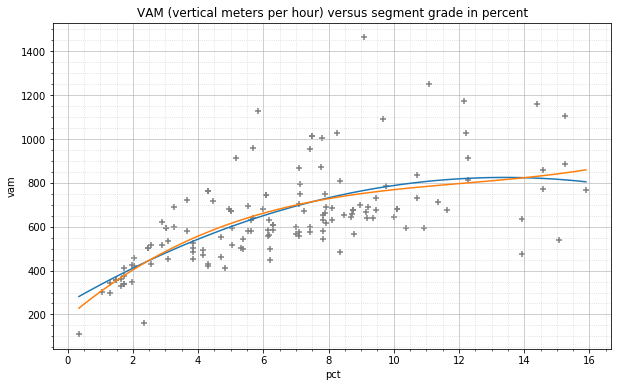

In [10]:
show('pct', 'vam', segments, 'VAM (vertical meters per hour) versus segment grade in percent')

Champion cyclists can do over 1800 meters/hour over a 10 km climb, and can sustain [1400 meters/hour for 7 hours](https://www.strava.com/activities/4996833865).  My VAM numbers range mostly from 400 to 900 meters/hour, but I can sustain the higher numbers for only a couple of minutes:

In [11]:
top(segments, 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
14,Camaritas climb,0.01,0.10,48,10.00,1463.0,480.0,9.09,0.16
71,Paloma Climb,0.02,0.14,82,7.00,1250.0,586.0,11.09,0.23
55,Klamath Dr.,0.02,0.12,77,6.00,1173.0,642.0,12.15,0.19
28,Entrance Way Hill Repeats,0.02,0.10,76,5.00,1158.0,760.0,14.39,0.16
25,Davenport Kicker,0.02,0.24,74,12.00,1128.0,308.0,5.84,0.39
121,Valparaiso steep,0.04,0.18,145,4.50,1105.0,806.0,15.26,0.29
42,Invernes to Firecrest Climb,0.04,0.28,143,7.00,1090.0,511.0,9.67,0.45
54,Kings Mountain final sprint,0.04,0.31,135,7.75,1029.0,435.0,8.25,0.50
57,Limantour Spit,0.09,0.47,303,5.22,1026.0,645.0,12.21,0.76
115,Tunitas flattens,0.05,0.42,166,8.40,1012.0,395.0,7.49,0.68


On segments that are at least a kilometer long my VAM tops out at about 800 meters/hour, and 500 meters/hour is  typical (about 1/3 of pro cyclists):

In [12]:
top(segments[segments.kms >= 1], 'vam')

,title,hours,miles,feet,mph,vam,fpm,pct,kms
69,Old La Honda Mile 1,0.13,0.99,370,7.62,868.0,374.0,7.08,1.59
129,Westridge,0.14,0.68,385,4.86,838.0,566.0,10.72,1.09
67,Old La Honda (Bridge to Stop),0.48,3.33,1255,6.94,797.0,377.0,7.14,5.36
68,Old La Honda (Bridge to Stop),0.51,3.33,1255,6.53,750.0,377.0,7.14,5.36
130,Westridge,0.16,0.68,385,4.25,733.0,566.0,10.72,1.09
119,Tunitas steep,0.25,1.20,599,4.80,730.0,499.0,9.45,1.93
70,Old La Honda Mile 1,0.16,0.99,370,6.19,705.0,374.0,7.08,1.59
139,Woodside Climb,0.13,1.71,295,13.15,692.0,173.0,3.27,2.75
40,Huddart,0.17,0.92,385,5.41,690.0,418.0,7.93,1.48
111,Top of Groton Rd heading west,0.13,0.92,291,7.08,682.0,316.0,5.99,1.48


I can also look at VAM numbers for complete rides. I would expect the ride VAM to be half the segment VAM (or less) since most of my rides are circuits where I return to the start, and thus no more than half the ride is climbing. Sure enough, the best I can do is about 400 meters/hour:

In [13]:
top(rides, 'vam')

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
238,"Sun, 11/29",2015,Mt. Hamilton,3.68,37.00,4902,10.05,406.0,132.0,2.51,59.53
23,"Fri, 4/2",2021,Everesting 5: climb 2×(OLH + WOLH),3.27,31.48,4344,9.63,405.0,138.0,2.61,50.65
27,"Mon, 3/29",2021,Everesting 1: Mt Diablo,2.60,22.22,3406,8.55,399.0,153.0,2.90,35.75
26,"Tue, 3/30",2021,Everesting 2: Kings + WOLH + OLH,3.34,35.99,4377,10.78,399.0,122.0,2.30,57.91
227,"Sun, 12/1",2013,Mt. Hamilton,3.78,37.56,4921,9.94,397.0,131.0,2.48,60.43
245,"Sat, 11/25",2017,Mt. Hamilton,3.69,36.65,4806,9.93,397.0,131.0,2.48,58.97
205,"Fri, 10/30",2015,OLH / West Alpine,3.48,39.51,4505,11.35,395.0,114.0,2.16,63.57
103,"Sat, 4/26",2014,OLH / Tunitas Creek,5.26,58.69,6742,11.16,391.0,115.0,2.18,94.43
94,"Sat, 4/18",2015,Tunitas + Lobitos Creeks,5.24,61.27,6611,11.69,385.0,108.0,2.04,98.58
78,"Wed, 10/14",2015,Half Moon Bay,6.13,72.97,7644,11.90,380.0,105.0,1.98,117.41


# Exploring the Data


Some more ways to look at the data, both rides and segments.

In [14]:
rides.describe() # Summary statistics for the rides

,year,hours,miles,feet,mph,vam,fpm,pct,kms
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2016.638672,3.234453,41.509863,1757.255859,13.017344,157.652344,41.443359,0.784727,66.789258
std,2.148205,1.376910,16.726251,1455.506065,1.306101,90.361008,27.424201,0.519316,26.912516
min,2012.000000,1.540000,20.960000,68.000000,8.550000,10.000000,3.000000,0.050000,33.720000
25%,2015.000000,2.177500,28.467500,709.000000,12.250000,80.750000,19.000000,0.370000,45.800000
50%,2017.000000,2.775000,35.880000,1335.500000,13.175000,152.000000,36.000000,0.690000,57.730000
75%,2018.000000,3.872500,50.527500,2254.750000,13.810000,217.250000,55.250000,1.055000,81.300000
max,2022.000000,8.140000,102.410000,7644.000000,16.750000,406.000000,153.000000,2.900000,164.780000


In [15]:
segments.describe() # Summary statistics for the segments

,hours,miles,feet,mph,vam,fpm,pct,kms
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.141702,0.932979,268.978723,7.444539,641.893617,353.503546,6.694894,1.501064
std,0.173711,0.989832,295.060659,3.557336,211.923595,186.816320,3.537974,1.592267
min,0.010000,0.080000,21.000000,2.120000,111.000000,18.000000,0.350000,0.130000
25%,0.050000,0.330000,104.000000,4.830000,503.000000,219.000000,4.140000,0.530000
50%,0.090000,0.600000,166.000000,6.190000,630.000000,333.000000,6.300000,0.970000
75%,0.150000,1.190000,303.000000,9.800000,724.000000,462.000000,8.760000,1.910000
max,1.390000,7.380000,1887.000000,19.790000,1463.000000,839.000000,15.890000,11.870000


In [16]:
top(rides, 'mph') # Fastest rides (of more than 20 miles)

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
244,"Sun, 5/22",2016,Canada,2.19,36.68,1332,16.75,185.0,36.0,0.69,59.02
268,"Wed, 9/13",2017,Healdburg / Jimtown,2.13,34.45,912,16.17,131.0,26.0,0.50,55.43
489,"Sat, 1/25",2014,Woodside,1.56,25.08,1243,16.08,243.0,50.0,0.94,40.35
498,"Sat, 4/11",2015,Woodside,1.54,24.73,1035,16.06,205.0,42.0,0.79,39.79
14,"Sun, 7/11",2021,San Jose,4.10,65.10,1086,15.88,81.0,17.0,0.32,104.75
449,"Sun, 1/18",2015,Woodside,1.64,26.02,1257,15.87,234.0,48.0,0.91,41.87
487,"Fri, 6/24",2016,Foothill Expway,1.59,25.11,623,15.79,119.0,25.0,0.47,40.40
288,"Sun, 1/26",2014,Canada Rd,2.10,33.12,1446,15.77,210.0,44.0,0.83,53.29
507,"Fri, 1/6",2012,Omarama to Wanaka New Zealand,4.48,70.35,3262,15.70,222.0,46.0,0.88,113.19
312,"Sun, 4/12",2015,Palo Alto Cycling,2.03,31.76,1210,15.65,182.0,38.0,0.72,51.10


In [17]:
top(segments, 'mph') # Fastest segments (there are no descent segments in the database)

,title,hours,miles,feet,mph,vam,fpm,pct,kms
76,PCH Pescadero to Bean Hollow,0.14,2.77,51,19.79,111.0,18.0,0.35,4.46
36,Highway 1 Cascanoa to Cascade,0.09,1.61,89,17.89,301.0,55.0,1.05,2.59
123,Vickrey Fruitvale,0.06,0.99,68,16.50,345.0,69.0,1.30,1.59
39,Highway 9 Mantalvo,0.03,0.45,35,15.00,356.0,78.0,1.47,0.72
38,Highway 9 Mantalvo,0.03,0.45,35,15.00,356.0,78.0,1.47,0.72
109,The Boneyard,0.10,1.48,135,14.80,411.0,91.0,1.73,2.38
124,Vickrey Fruitvale,0.07,0.99,68,14.14,296.0,69.0,1.30,1.59
90,Sand Hill Alpine to 280,0.12,1.67,180,13.92,457.0,108.0,2.04,2.69
15,Canada to College,0.10,1.37,119,13.70,363.0,87.0,1.65,2.20
30,Foothill Homestead,0.09,1.22,126,13.56,427.0,103.0,1.96,1.96


In [18]:
top(segments, 'feet') # Biggest climbing segments

,title,hours,miles,feet,mph,vam,fpm,pct,kms
128,West Alpine full,1.39,7.38,1887,5.31,414.0,256.0,4.84,11.87
51,Kings Greer to Skyline,0.78,3.92,1536,5.03,600.0,392.0,7.42,6.31
52,Kings Greer to Skyline,0.81,3.92,1536,4.84,578.0,392.0,7.42,6.31
67,Old La Honda (Bridge to Stop),0.48,3.33,1255,6.94,797.0,377.0,7.14,5.36
68,Old La Honda (Bridge to Stop),0.51,3.33,1255,6.53,750.0,377.0,7.14,5.36
0,Alma Mountain Charlie,0.53,3.12,875,5.89,503.0,280.0,5.31,5.02
47,Kings half way,0.46,2.89,820,6.28,543.0,284.0,5.37,4.65
48,Kings half way,0.50,2.89,820,5.78,500.0,284.0,5.37,4.65
5,Alpine Portola to top Joaquin,0.57,3.52,801,6.18,428.0,228.0,4.31,5.66
6,Alpine Portola to top Joaquin,0.58,3.52,801,6.07,421.0,228.0,4.31,5.66


In [19]:
top(segments, 'pct') # Steepest climbs

,title,hours,miles,feet,mph,vam,fpm,pct,kms
84,Redwood Gulch hits,0.06,0.18,151,3.00,767.0,839.0,15.89,0.29
121,Valparaiso steep,0.04,0.18,145,4.50,1105.0,806.0,15.26,0.29
122,Valparaiso steep,0.05,0.18,145,3.60,884.0,806.0,15.26,0.29
58,Limantour steepest,0.09,0.20,159,2.22,538.0,795.0,15.06,0.32
44,Joaquin,0.10,0.33,254,3.30,774.0,770.0,14.58,0.53
43,Joaquin,0.09,0.33,254,3.67,860.0,770.0,14.58,0.53
28,Entrance Way Hill Repeats,0.02,0.10,76,5.00,1158.0,760.0,14.39,0.16
102,Stirrup Wall,0.06,0.17,125,2.83,635.0,735.0,13.93,0.27
103,Stirrup Wall,0.08,0.17,125,2.12,476.0,735.0,13.93,0.27
131,Westridge 3min,0.08,0.37,240,4.62,914.0,649.0,12.29,0.60


In [20]:
top(rides, 'miles') # Longest rides

,date,year,title,hours,miles,feet,mph,vam,fpm,pct,kms
510,"Fri, 1/9",2012,Otago Rail Trail Century,7.87,102.41,2286,13.01,89.0,22.0,0.42,164.78
4,"Sat, 5/7",2022,Wine Country Century,6.65,100.26,5253,15.08,241.0,52.0,0.99,161.32
511,"Thu, 6/14",2012,Coyote Creek Century with Juliet,8.14,100.07,1513,12.29,57.0,15.0,0.29,161.01
68,"Sat, 5/13",2017,Morgan Hill iCare Classic,7.46,100.05,4596,13.41,188.0,46.0,0.87,160.98
69,"Sat, 5/12",2018,"ICare Classic, Morgan Hill",6.80,91.29,4160,13.42,186.0,46.0,0.86,146.89
70,"Sat, 5/6",2017,Wine Country Century,7.26,89.49,5246,12.33,220.0,59.0,1.11,143.99
71,"Fri, 8/10",2018,Bike Ride Northwest Day 6,6.24,84.70,4380,13.57,214.0,52.0,0.98,136.28
54,"Fri, 2/28",2020,Sawyer Camp Trail,6.41,84.43,3448,13.17,164.0,41.0,0.77,135.85
39,"Sun, 8/30",2020,Los Gatos,6.36,80.92,2100,12.72,101.0,26.0,0.49,130.20
72,"Sat, 10/1",2016,Half Moon Bay overnight campout,7.51,80.07,6039,10.66,245.0,75.0,1.43,128.83


In [21]:
yearly

,year,hours,miles,feet,mph,vam,fpm,pct,kms
,2021,490.53,6064,196634,12.36,122.0,32.0,0.61,9757.78
,2020,438.88,5342,94777,12.17,66.0,18.0,0.34,8595.12
,2019,476.32,6016,149797,12.63,96.0,25.0,0.47,9679.90
,2018,475.93,6101,158642,12.82,102.0,26.0,0.49,9816.51
,2017,567.33,7356,202096,12.97,109.0,27.0,0.52,11836.45
,2016,486.38,6339,201453,13.03,126.0,32.0,0.60,10199.77
,2015,419.95,5453,209859,12.98,152.0,38.0,0.73,8773.23
,2014,191.03,2469,118481,12.93,189.0,48.0,0.91,3972.78
